# 5A

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from datetime import date
sns.set()
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing

In [3]:
import pwlf

In [4]:
plt.rcParams['figure.figsize'] = [16, 9]

In [5]:
w = pd.read_csv(r'The revised 292 F - 2018-12-31.csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [6]:
w = (w - 32)/1.8
w = w.round(2)

In [7]:
e = pd.read_csv(r'afterQ295(Dec2).csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [8]:
holidays = [
    date(2018, 1, 1),
    date(2018, 1, 15),
    date(2018, 2, 19),
    date(2018, 5, 28),
    date(2018, 7, 4),
    date(2018, 11, 12),
    date(2018, 11, 22),
    date(2018, 9, 3),
    date(2018, 10, 8),
    date(2018, 12, 5)
]

In [9]:
building_list = pd.read_excel('Revised startup and shutdown time all categories.xlsx', sheet_name='CT')

In [10]:
building_zone = np.unique(np.array(building_list['Climate Zone'].to_list()))

In [11]:
building_info = pd.read_excel('extracted data of 295 buildings.xlsx',  index_col=0)

In [25]:
buildings = [
    "PA0233ZZ",
    "MI0000BC",
    "MA0158ZZ",
    "MA0131ZZ",
    "MA0011ZZ",
    "IN0133ZZ",
    "IL0236FC",
    "IL0054ZZ",
    "IL0032ZZ",
    "IA0112ZZ",
    "CT0061ZZ",
    "CT0013ZZ",
]

In [114]:
# OFFICE

In [15]:
office = {'1A': ['FL0010ZZ'],
 '2A': ['FL0067ZZ', 'GA0077AC'],
 '3A': ['GA0010AE', 'GA0087AD', 'GA1007ZZ', 'TX0302ZZ'], 
 '3B': [],
 '3C': [],
 '4A': ['MD0205ZZ', 'MO0134ZZ','MO0106ZZ','MD0205ZZ'],
 '4C': ['WA0000KC'], 
 '5A': ['RI0009ZZ', 'NY0300ZZ','NE0056ZZ', 'MI0000MC', 'MA0153ZZ', 'IL2125ZZ','IL0303ZZ','IL0236FC','IL0214ZZ'],
 '5B': ['UT0039ZZ', 'CO0054ZZ', 'CO0000AA'], 
 '6A': ['SD0040ZZ', 'MN0086TC', 'ME0035ZZ'], 
 '6B': ['MT0017ZZ', 'MT0000AG', 'MT0000AF'],
 '7': ['ND0018ZZ','ND0000AO'],
}

In [16]:
buildings = office['5A']

In [26]:
buildings

['PA0233ZZ',
 'MI0000BC',
 'MA0158ZZ',
 'MA0131ZZ',
 'MA0011ZZ',
 'IN0133ZZ',
 'IL0236FC',
 'IL0054ZZ',
 'IL0032ZZ',
 'IA0112ZZ',
 'CT0061ZZ',
 'CT0013ZZ']

In [27]:
len(buildings)

12

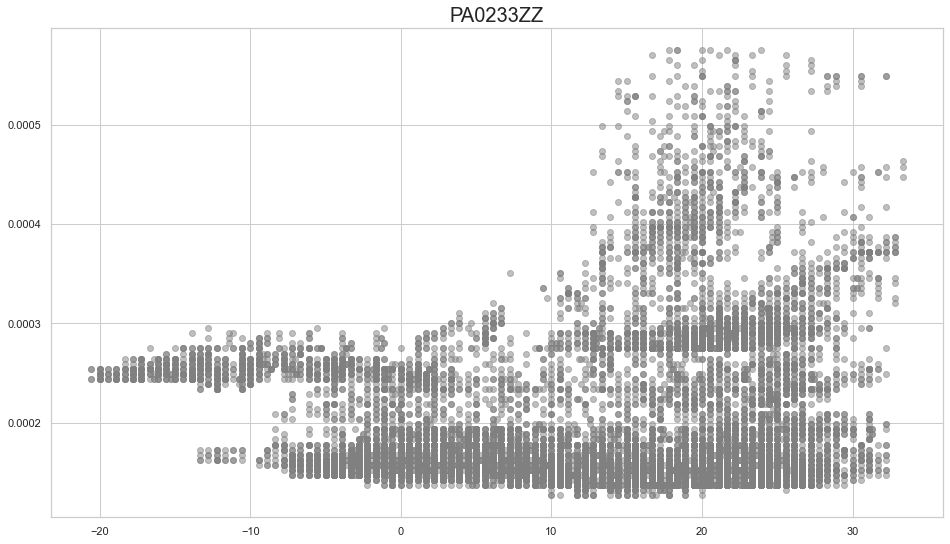

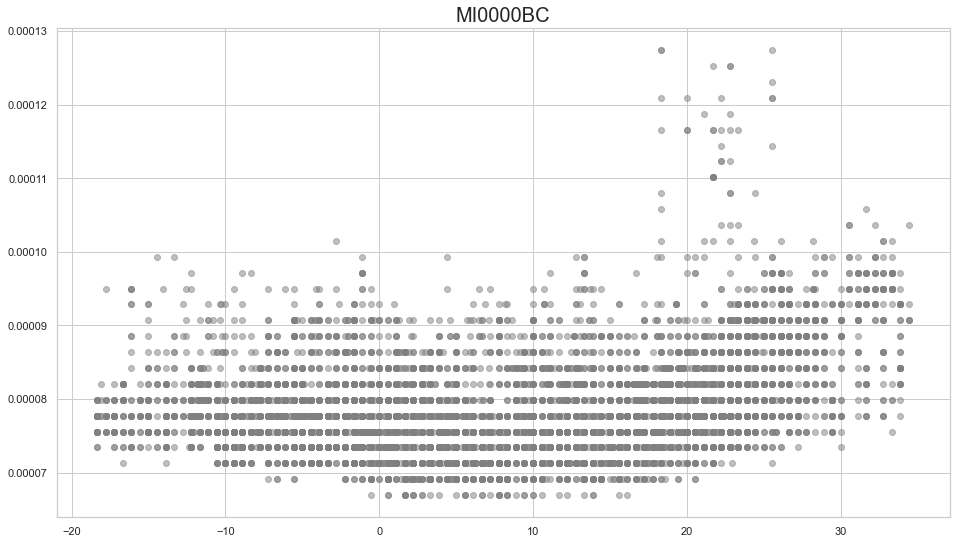

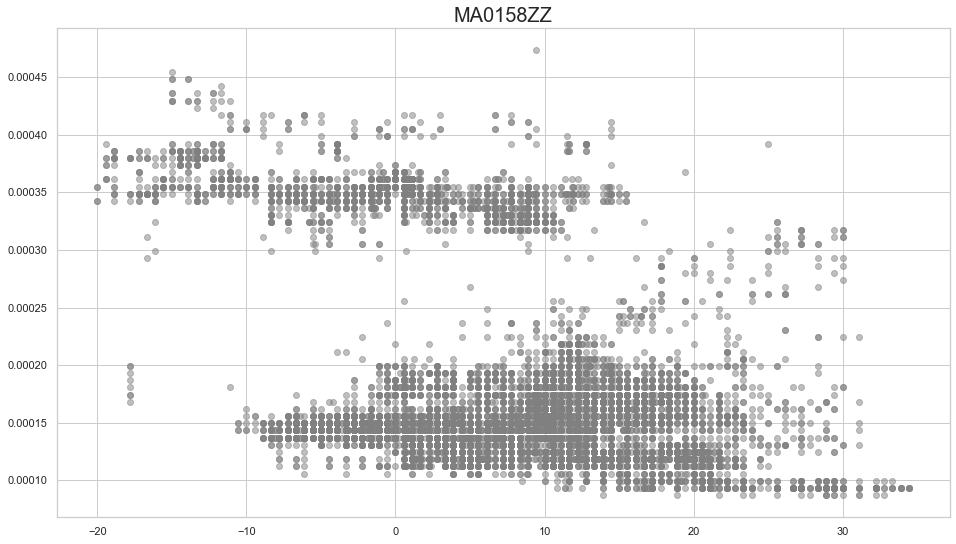

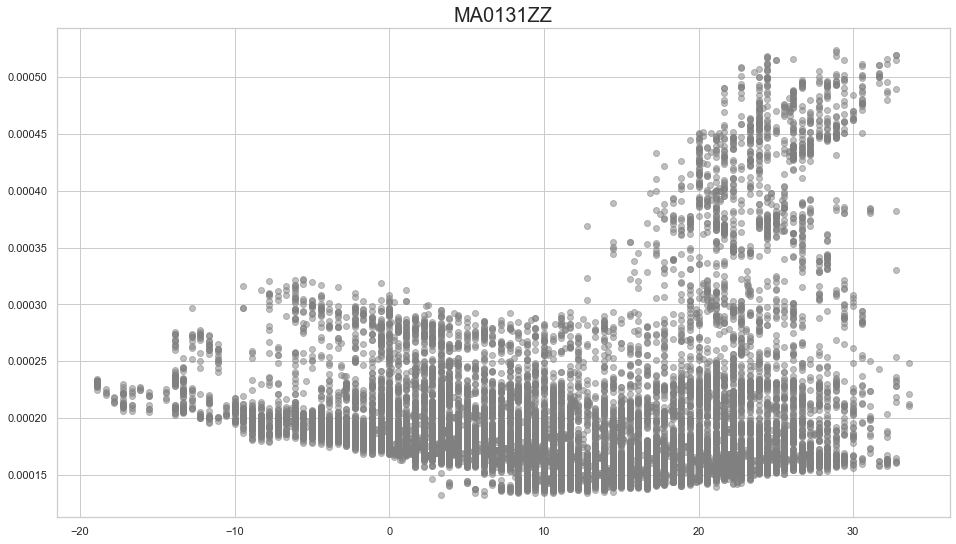

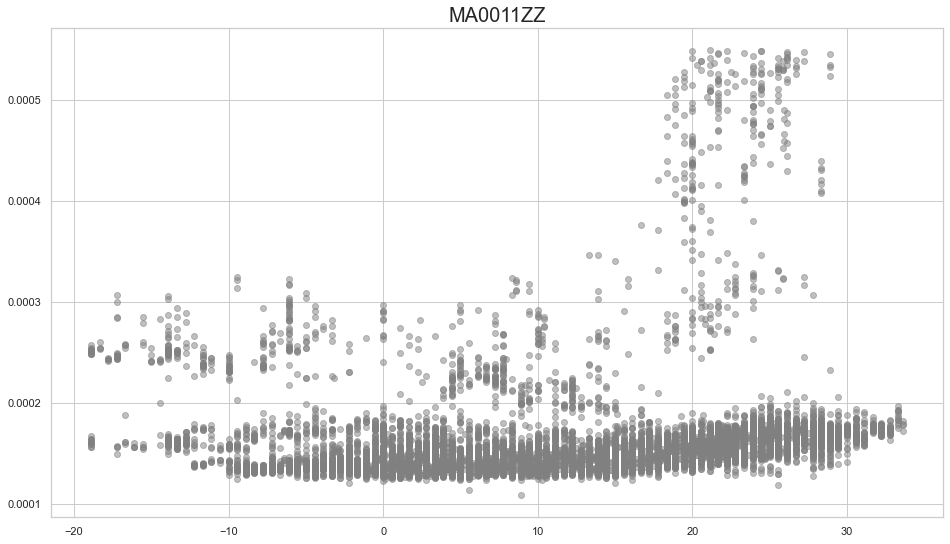

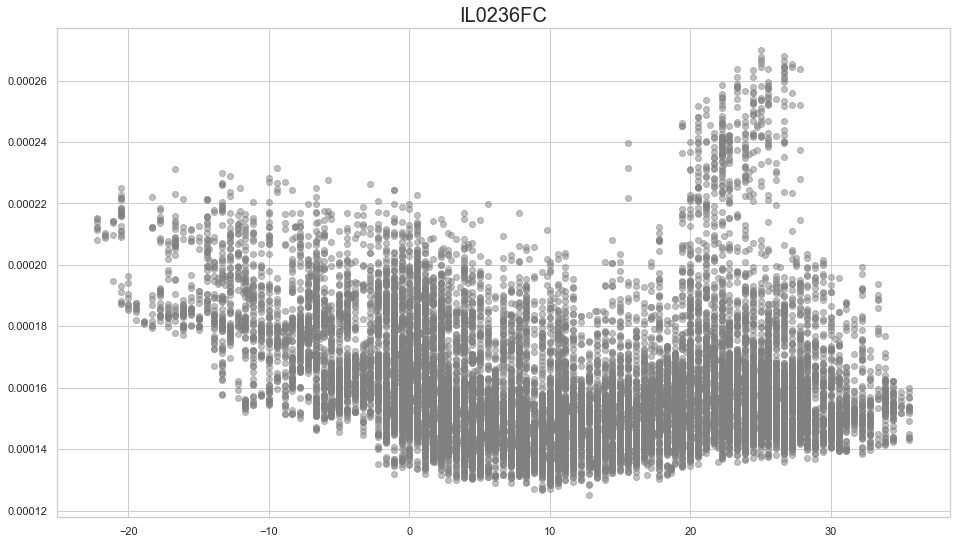

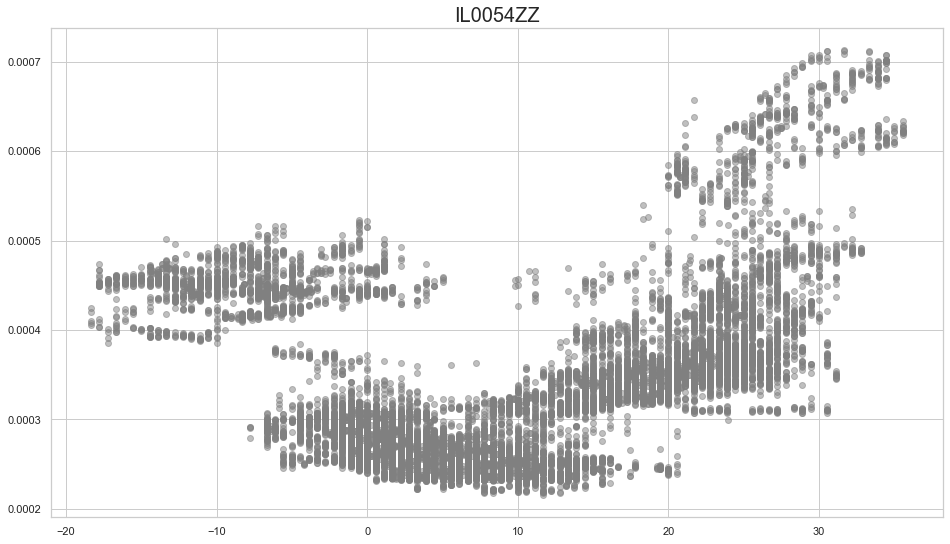

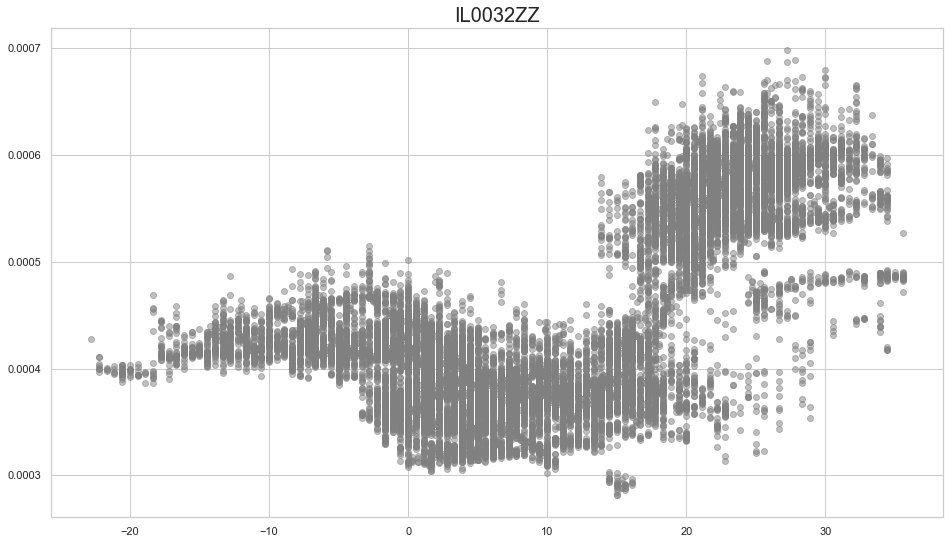

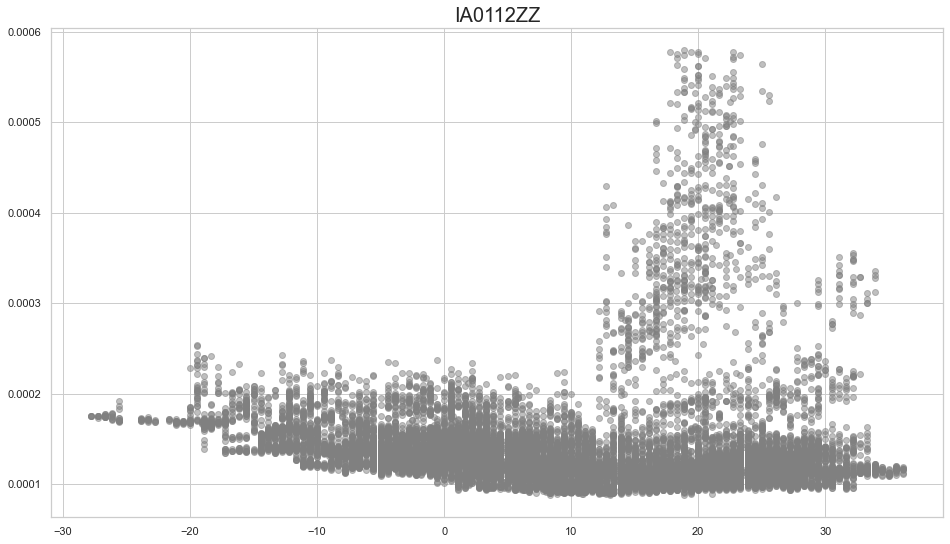

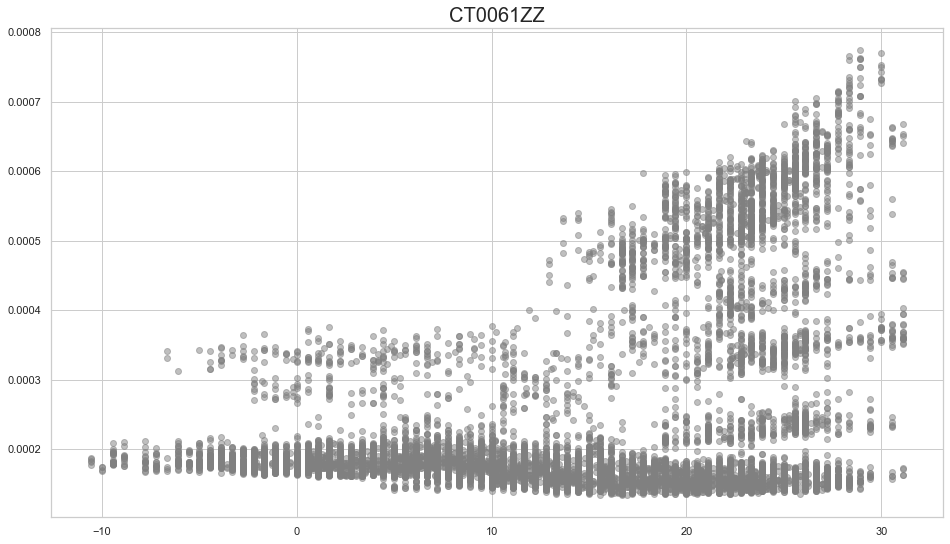

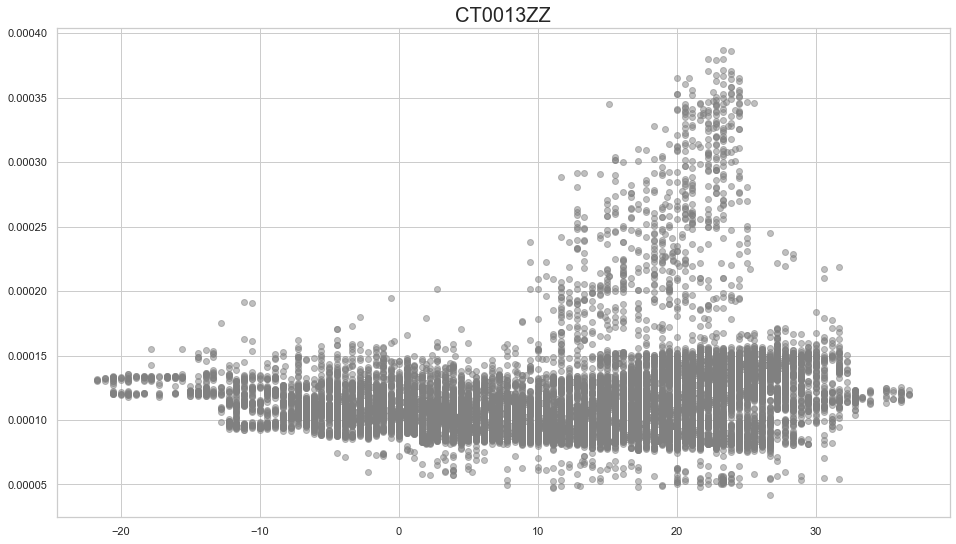

In [35]:
for i in buildings:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
#     data = data[data['e'] > 0]
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
#     f = pwlf.PiecewiseLinFit(x, y)
#     res = f.fit(3)
    plt.subplots()
    plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='gray', alpha=0.5)
#     plt.scatter(x, f.predict(x))
    plt.title(f'{i}', fontsize=20)

### regression with cleaning

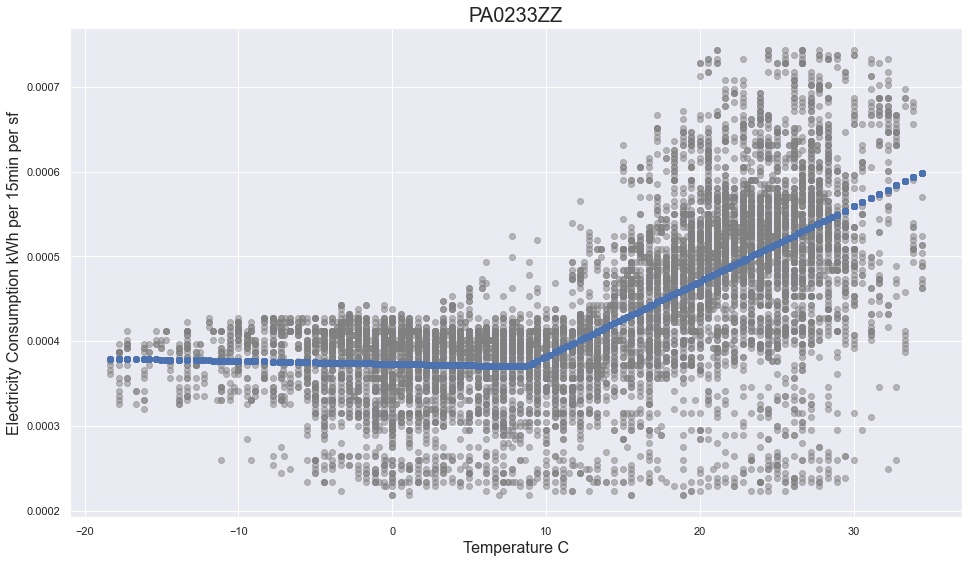

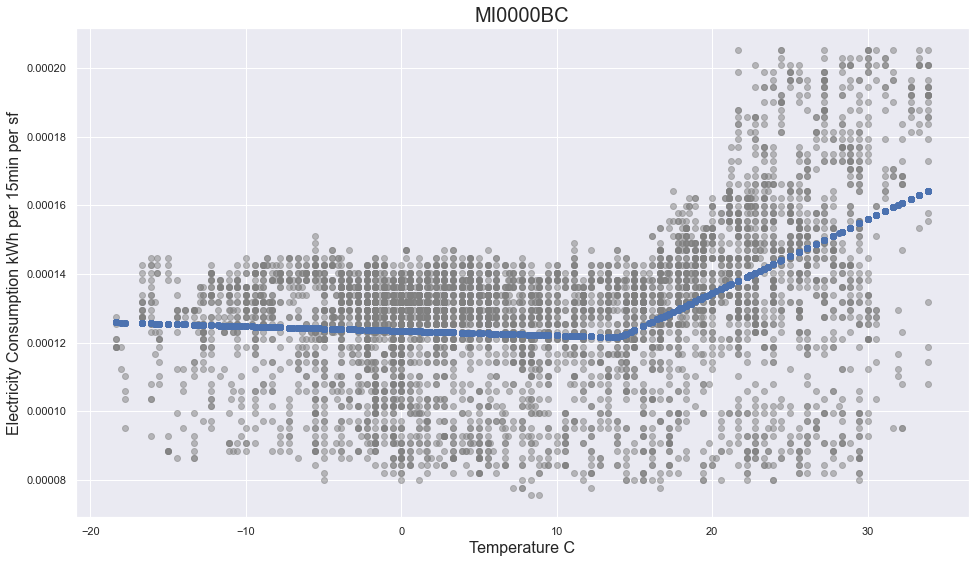

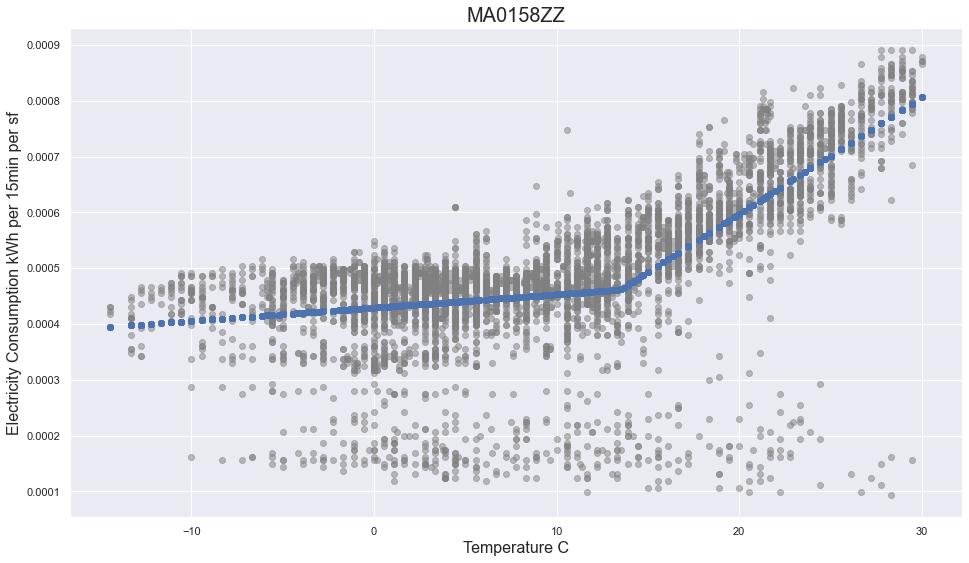

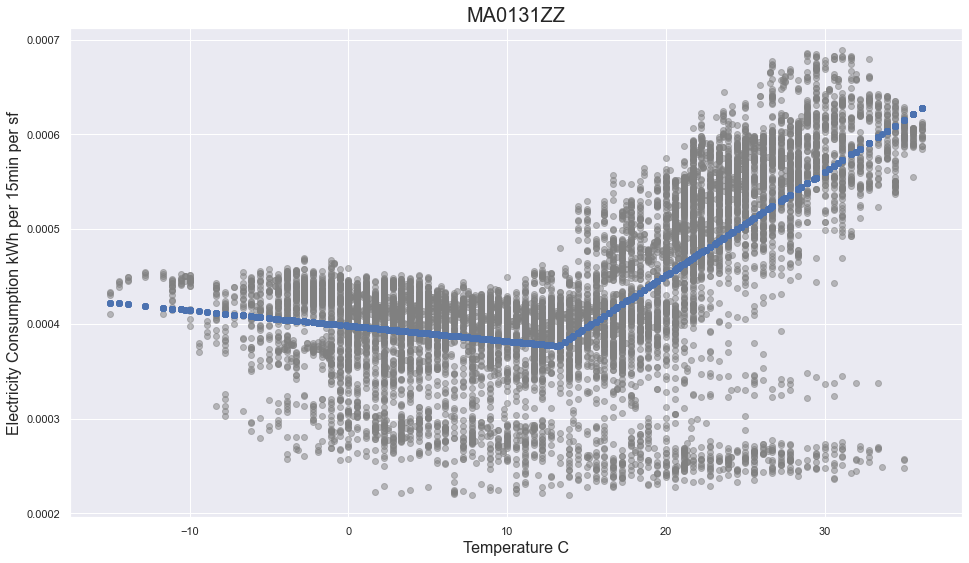

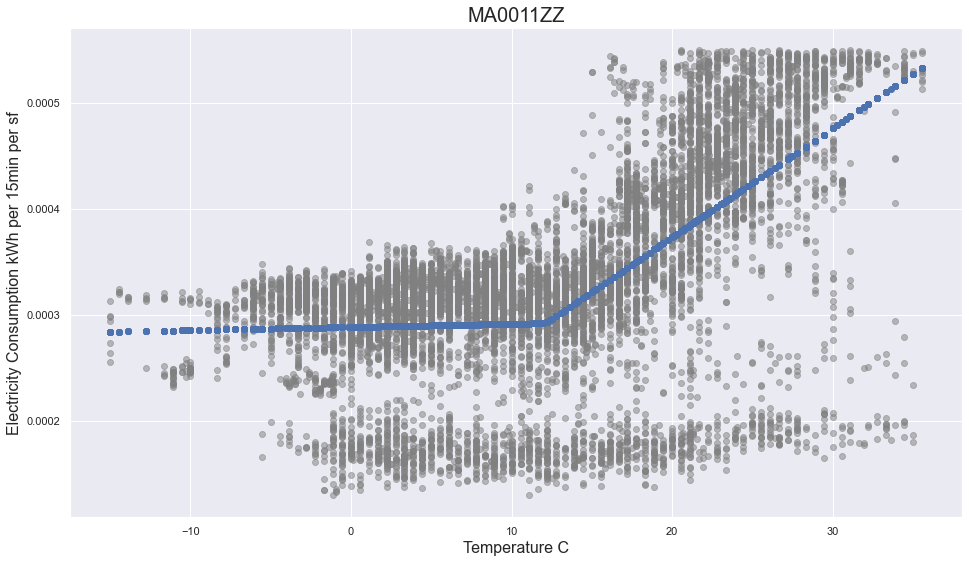

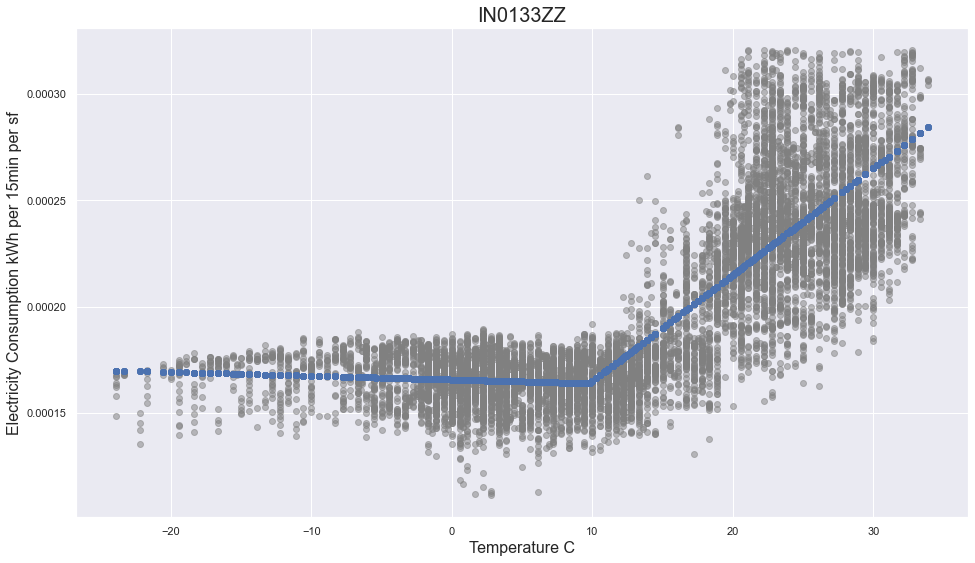

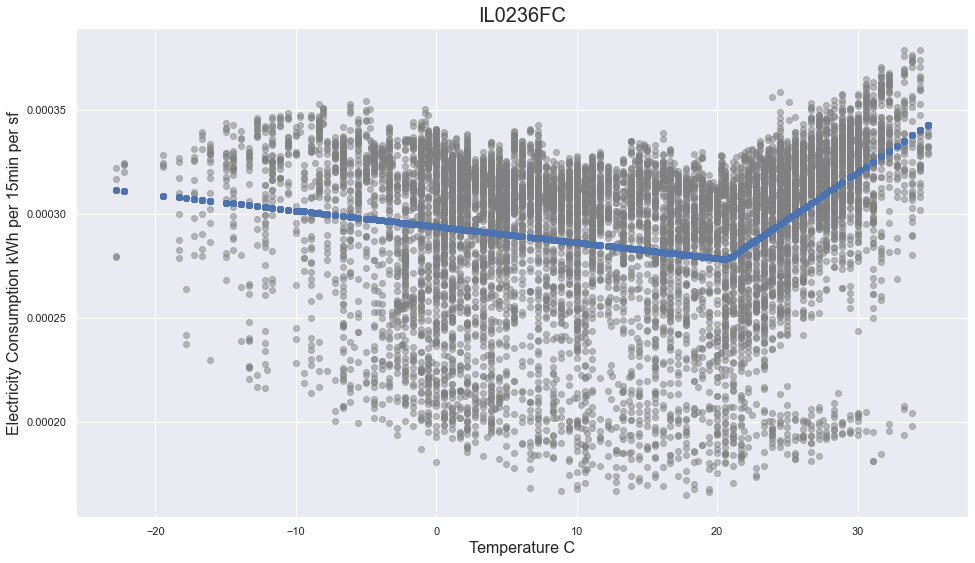

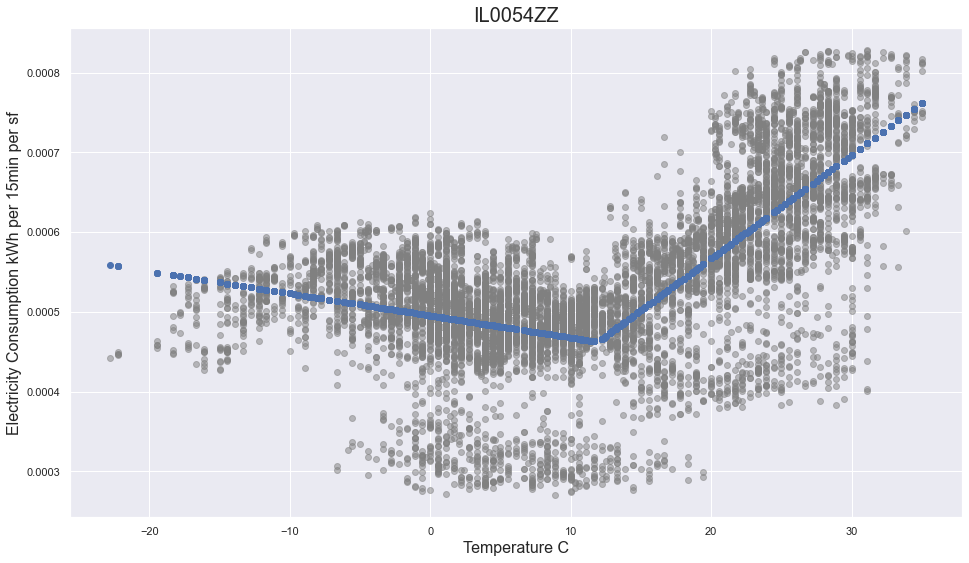

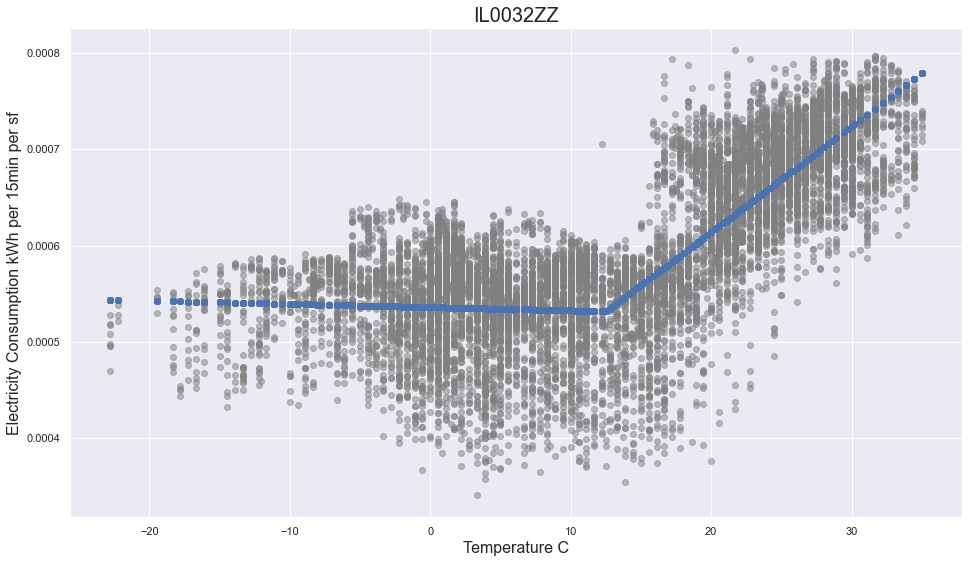

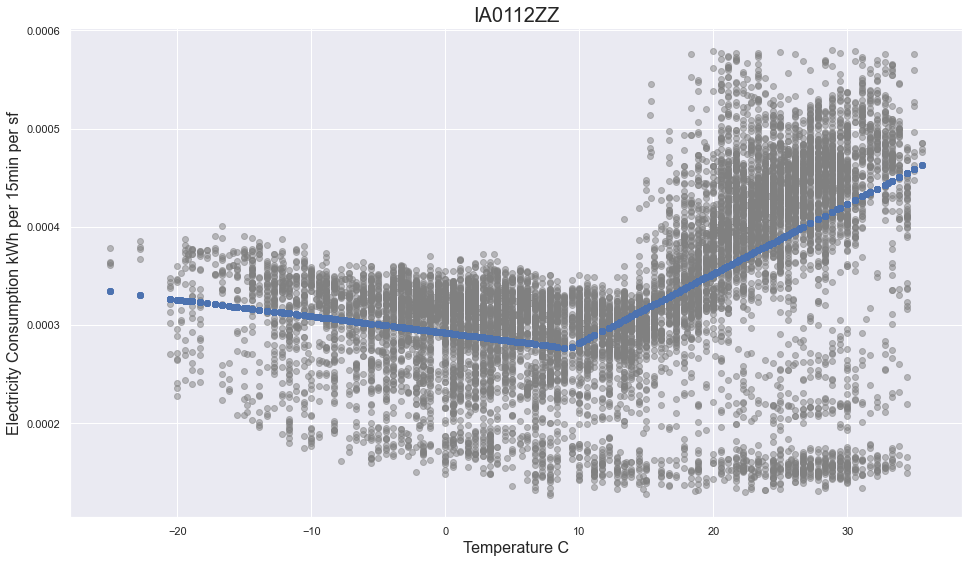

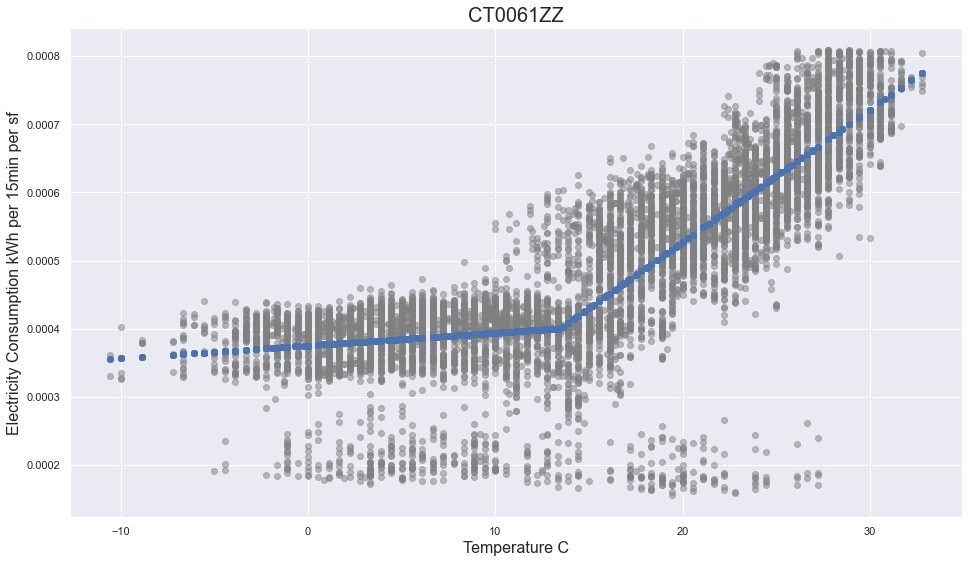

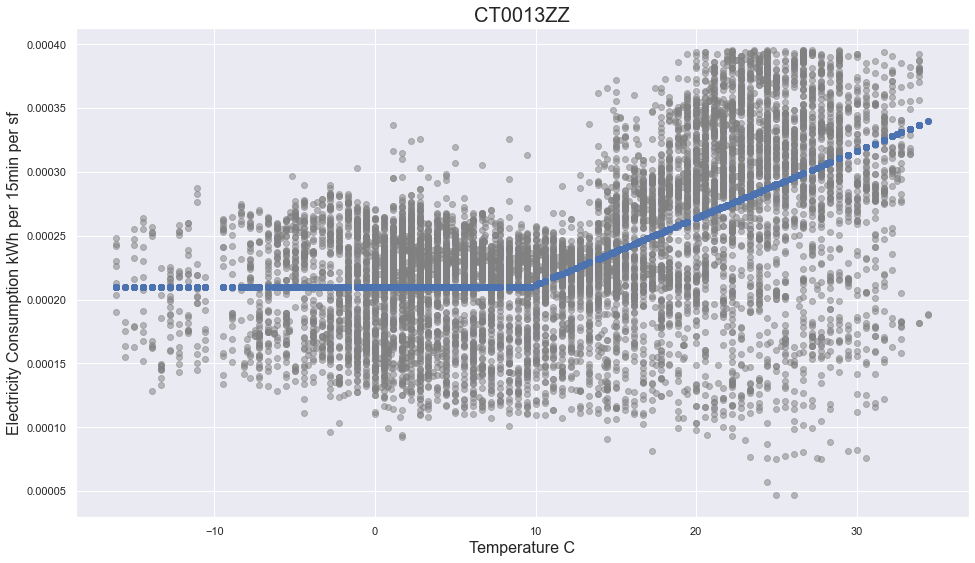

In [30]:
for i in list(buildings):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(2)
    plt.subplots()
    plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='gray', alpha=0.5)
    plt.scatter(x, f.predict(x))
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.title(f'{i}', fontsize=20)

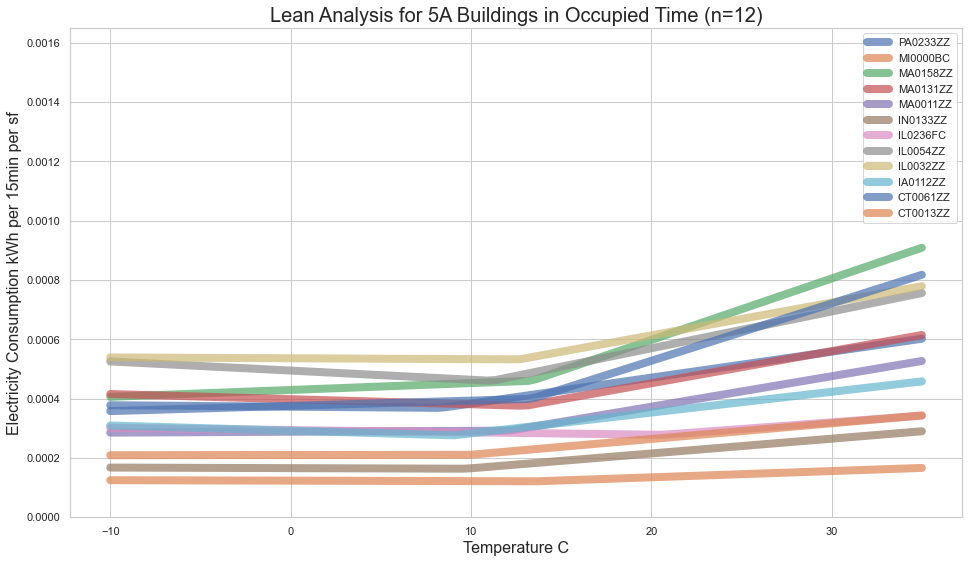

In [32]:
sns.set_style("whitegrid")
for i in list(buildings):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
#     data = data[data > 0]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(2)
    x_ = np.linspace(-10, 35, 100)
    plt.plot(x_, f.predict(x_), label=i, alpha=0.7, lw=8)
    plt.legend(loc='upper right')
    plt.title(f'Lean Analysis for 5A Buildings in Occupied Time (n=12)', fontsize=20)
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.ylim(0, 0.00165)

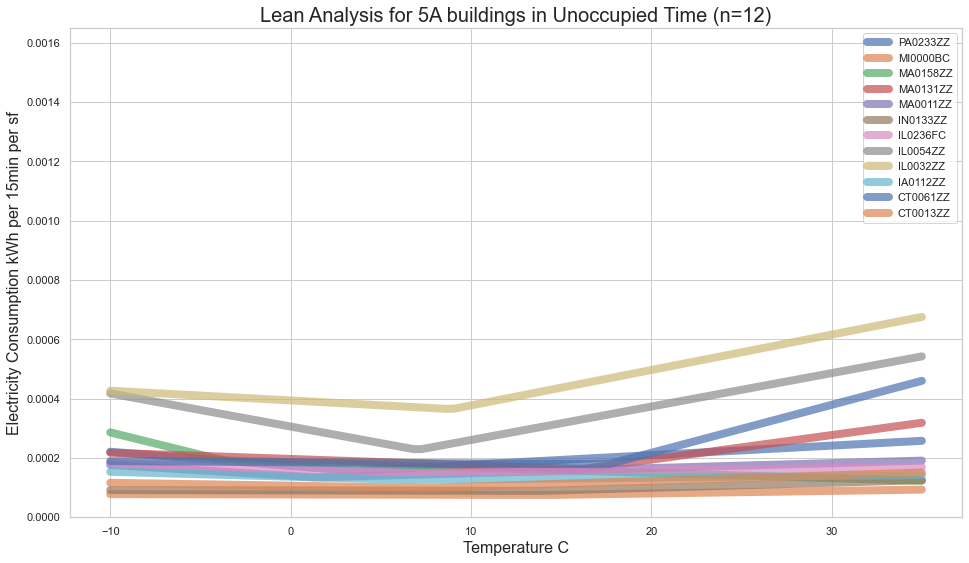

In [34]:
sns.set_style("whitegrid")
for i in list(buildings):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(2)
    x_ = np.linspace(-10, 35, 100)
    plt.plot(x_, f.predict(x_), label=i, alpha=0.7, lw=8)
    plt.legend(loc='upper right')
    plt.title(f'Lean Analysis for 5A buildings in Unoccupied Time (n=12)', fontsize=20)
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.ylim(0, 0.00165)

## unoccupied lean details

In [139]:
result = pd.DataFrame()
result['building'] = list(segment.keys())
balance_point = []
slope1, slope2 = [], []
intercept1, intercept2 = [], []

In [140]:
for i in list(segment.keys()):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    balance_point.append(balancePoint)
    slope1.append(a1)
    slope2.append(a2)
    intercept1.append(b1)
    intercept2.append(b2) 

In [141]:
result['balancePoint'] = balance_point
result['slope1'] = slope1
result['slope2'] = slope2
result['intercept1'] = intercept1
result['intercept2'] = intercept2

In [142]:
result.to_csv('4A 19 unoccupied lean detail.csv', index=False)

In [143]:
pd.read_csv('4A 19 unoccupied lean detail.csv')

building  balancePoint        slope1        slope2  intercept1  intercept2
0   DC0010ZZ     19.450811 -9.989165e-07  1.082962e-05    0.000221   -0.000009
1   DC0011ZZ     21.381884  3.779939e-06  1.227104e-05    0.000674    0.000492
2   DC0021ZZ     12.324918 -9.279853e-07  4.859696e-06    0.000213    0.000141
3   DC0078ZZ     23.310396 -5.678949e-07  1.126958e-05    0.000397    0.000122
4   DC0313ZZ     13.176656 -7.556432e-06  4.384788e-07    0.000281    0.000175
5   DC0459AF     16.567058 -1.058874e-06  6.010044e-06    0.000307    0.000190
6   DC0463ZZ     17.677290 -1.359747e-06  8.228640e-06    0.000549    0.000380
7   DC0501BC     25.506467  1.547844e-06 -6.217224e-06    0.000150    0.000348
8   DC0505ZZ     14.277143 -4.090774e-06  1.130356e-05    0.000620    0.000401
9   MD0000HC      8.933989 -6.259670e-06  5.423661e-07    0.000606    0.000545
10  MD0334ZZ     11.816645 -2.069595e-06  2.407456e-05    0.000838    0.000529
11  MD0778AG     10.462191  1.138999e-06  3.453270e-06    0.000198    0.000173
12  MO0000AF     12.484583 -1.297135e-06  2.441492e-06    0.000388    0.000341
13  MO0127ZZ     13.426647 -6.382232e-07  7.569354e-06    0.000225    0.000115
14  NC0002AE      7.034999 -1.646795e-06  1.601775e-07    0.000273    0.000260
15  PA0000AT     15.236805 -3.209803e-06  2.797431e-06    0.000727    0.000636
16  PA0144ZZ     12.821057 -1.968921e-07  1.581198e-06    0.000176    0.000153
17  VA0088ZZ      9.191613 -3.882627e-06  4.266178e-06    0.000151    0.000076
18  WV0054FP      8.655754 -3.832202e-08  7.618349e-06    0.000248    0.000182
19  WV0226ZZ     18.088244 -7.780448e-07  1.253026e-05    0.000749    0.000508

# Occupied lean details

In [152]:
result_occ = pd.DataFrame()
result_occ['building'] = list(segment.keys())
balance_point = []
slope1, slope2 = [], []
intercept1, intercept2 = [], []

In [153]:
for i in list(segment.keys()):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    balance_point.append(balancePoint)
    slope1.append(a1)
    slope2.append(a2)
    intercept1.append(b1)
    intercept2.append(b2) 

In [154]:
result_occ['balancePoint'] = balance_point
result_occ['slope1'] = slope1
result_occ['slope2'] = slope2
result_occ['intercept1'] = intercept1
result_occ['intercept2'] = intercept2

In [155]:
result_occ

building  balancePoint        slope1    slope2  intercept1  intercept2
0   DC0010ZZ     14.241131  8.398300e-08  0.000014    0.000427    0.000234
1   DC0011ZZ      2.000304 -4.213855e-06  0.000011    0.001064    0.001032
2   DC0021ZZ     12.028996  6.781413e-08  0.000008    0.000296    0.000206
3   DC0078ZZ      4.721682  1.669526e-06  0.000018    0.000654    0.000575
4   DC0313ZZ     14.407881 -4.095390e-06  0.000019    0.000435    0.000097
5   DC0459AF     15.573904  3.194485e-07  0.000006    0.000384    0.000300
6   DC0463ZZ     16.212108 -3.680479e-07  0.000009    0.000656    0.000502
7   DC0501BC     14.518899  1.395744e-06  0.000015    0.000411    0.000210
8   DC0505ZZ     14.487598 -2.986930e-06  0.000015    0.000818    0.000557
9   MD0000HC     12.770057 -2.563303e-06  0.000005    0.000793    0.000690
10  MD0334ZZ     13.192380  2.296562e-06  0.000024    0.001067    0.000778
11  MD0778AG     16.431310  2.059098e-06  0.000007    0.000356    0.000275
12  MO0000AF     11.766790 -9.710716e-07  0.000004    0.000420    0.000366
13  MO0127ZZ      8.826844 -4.498629e-07  0.000007    0.000386    0.000316
14  NC0002AE     10.766102 -7.713729e-07  0.000010    0.000345    0.000230
15  PA0000AT     11.506288 -8.323558e-07  0.000013    0.000907    0.000743
16  PA0144ZZ     10.406368  3.176777e-07  0.000011    0.000357    0.000244
17  VA0088ZZ     16.209766  1.829951e-06  0.000006    0.000247    0.000181
18  WV0054FP      8.016216  2.670760e-06  0.000011    0.000383    0.000313
19  WV0226ZZ     13.851333 -2.976554e-07  0.000010    0.000935    0.000797

In [157]:
result_occ.to_csv('4A 19 occupied lean detail.csv', index=False)

## Occupied without clean

In [161]:
result_occ_ = pd.DataFrame()
result_occ_['building'] = list(segment.keys())
balance_point = []
slope1, slope2 = [], []
intercept1, intercept2 = [], []

In [162]:
for i in list(segment.keys()):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
#     clustering = DBSCAN(eps=5, min_samples=8).fit(data)
#     res = np.unique(clustering.labels_, return_counts=True)
#     maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'], (data)['e']
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    balance_point.append(balancePoint)
    slope1.append(a1)
    slope2.append(a2)
    intercept1.append(b1)
    intercept2.append(b2) 

In [163]:
result_occ_['balancePoint'] = balance_point
result_occ_['slope1'] = slope1
result_occ_['slope2'] = slope2
result_occ_['intercept1'] = intercept1
result_occ_['intercept2'] = intercept2

In [164]:
result_occ_

building  balancePoint        slope1    slope2  intercept1  intercept2
0   DC0010ZZ     14.155197  2.150374e-07  0.000014    0.000419    0.000227
1   DC0011ZZ      0.769681 -8.852687e-06  0.000011    0.001035    0.001020
2   DC0021ZZ     12.166279  1.230989e-07  0.000008    0.000296    0.000205
3   DC0078ZZ      4.939936  2.094340e-06  0.000018    0.000654    0.000574
4   DC0313ZZ     14.914957 -3.665400e-06  0.000020    0.000434    0.000082
5   DC0459AF     10.892344 -3.099050e-06  0.000007    0.000355    0.000242
6   DC0463ZZ     15.881785 -4.925733e-07  0.000009    0.000657    0.000507
7   DC0501BC     15.023686  2.138599e-06  0.000016    0.000402    0.000200
8   DC0505ZZ     11.812131 -3.414026e-06  0.000016    0.000766    0.000542
9   MD0000HC     30.887509  1.937122e-06 -0.000049    0.000768    0.002329
10  MD0334ZZ     13.688327  3.709594e-06  0.000023    0.001051    0.000790
11  MD0778AG     16.861183  2.159316e-06  0.000007    0.000354    0.000270
12  MO0000AF     10.828031 -1.854081e-06  0.000003    0.000428    0.000371
13  MO0127ZZ     33.978861  3.049124e-06 -0.000112    0.000349    0.004273
14  NC0002AE     11.013768 -6.390084e-07  0.000010    0.000345    0.000228
15  PA0000AT     10.325454 -7.984157e-06  0.000021    0.000834    0.000532
16  PA0144ZZ      9.861875  6.444736e-07  0.000010    0.000356    0.000265
17  VA0088ZZ     16.079149  1.809377e-06  0.000006    0.000247    0.000181
18  WV0054FP      8.188779  2.771195e-06  0.000011    0.000383    0.000312
19  WV0226ZZ     13.788903 -2.548918e-07  0.000010    0.000934    0.000797

In [165]:
result_occ_.to_csv('4A 19 occupied lean detail without cleaning.csv', index=False)

## Unoccupied without clean

In [166]:
result_unocc_ = pd.DataFrame()
result_unocc_['building'] = list(segment.keys())
balance_point = []
slope1, slope2 = [], []
intercept1, intercept2 = [], []

In [167]:
for i in list(segment.keys()):
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
#     clustering = DBSCAN(eps=5, min_samples=8).fit(data)
#     res = np.unique(clustering.labels_, return_counts=True)
#     maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'], (data)['e']
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    balance_point.append(balancePoint)
    slope1.append(a1)
    slope2.append(a2)
    intercept1.append(b1)
    intercept2.append(b2) 

In [168]:
result_unocc_['balancePoint'] = balance_point
result_unocc_['slope1'] = slope1
result_unocc_['slope2'] = slope2
result_unocc_['intercept1'] = intercept1
result_unocc_['intercept2'] = intercept2

In [169]:
result_unocc_

building  balancePoint        slope1        slope2  intercept1  intercept2
0   DC0010ZZ     18.965711 -1.094333e-06  1.090432e-05    0.000221   -0.000006
1   DC0011ZZ     23.061149  3.062974e-06  1.564826e-05    0.000680    0.000390
2   DC0021ZZ     13.100086 -7.710446e-07  5.091549e-06    0.000213    0.000136
3   DC0078ZZ     22.892283 -6.522587e-07  1.058189e-05    0.000398    0.000141
4   DC0313ZZ     13.125982 -7.567580e-06  4.233996e-07    0.000281    0.000176
5   DC0459AF     11.744598 -3.733027e-06  7.452961e-06    0.000285    0.000153
6   DC0463ZZ     18.012444 -1.238122e-06  8.463297e-06    0.000549    0.000374
7   DC0501BC     25.803582  1.528099e-06 -6.728851e-06    0.000150    0.000363
8   DC0505ZZ     13.956357 -3.482435e-06  1.158180e-05    0.000605    0.000394
9   MD0000HC      8.725426 -6.593755e-06  6.797004e-07    0.000608    0.000544
10  MD0334ZZ     12.197013 -1.875175e-06  2.299254e-05    0.000836    0.000533
11  MD0778AG     10.234604  7.206637e-07  3.580254e-06    0.000200    0.000171
12  MO0000AF     10.181339 -2.417129e-06  2.159011e-06    0.000395    0.000349
13  MO0127ZZ     24.042356  9.102910e-07  1.131644e-05    0.000205   -0.000045
14  NC0002AE      6.823779 -1.669822e-06  1.530470e-07    0.000273    0.000260
15  PA0000AT      8.774371 -8.495025e-06  8.082628e-06    0.000661    0.000515
16  PA0144ZZ      9.952064 -9.374837e-08  1.551837e-06    0.000176    0.000160
17  VA0088ZZ      8.668500 -4.125702e-06  4.135792e-06    0.000151    0.000079
18  WV0054FP      8.514841 -1.127934e-07  7.589048e-06    0.000248    0.000182
19  WV0226ZZ     18.575413 -6.082666e-07  1.306012e-05    0.000749    0.000495

In [171]:
result_unocc_.to_csv('4A 19 unoccupied lean detail without cleaning.csv', index=False)

# balance point comparision Occ vs Unocc

In [178]:
df = pd.DataFrame()

In [179]:
df['Occupied'] = result_occ['balancePoint']
df['Unoccupied'] = result['balancePoint']

Text(0.5, 1.0, 'Blance Points for Buildings in 4A (n=19)')

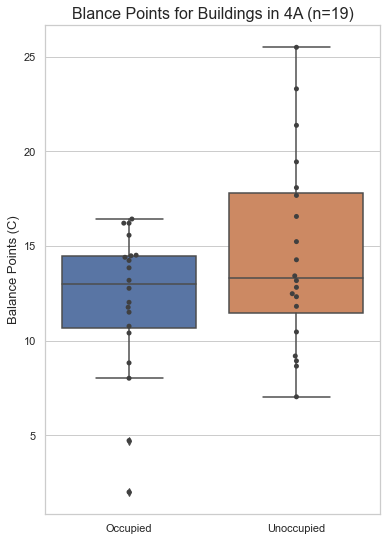

In [185]:
fig, ax = plt.subplots(figsize=(6,9))
ax = sns.boxplot(data=df, orient='v')
ax = sns.swarmplot(data=df, color=".25", orient='v')
plt.ylabel('Balance Points (C)', size=13)
plt.title('Blance Points for Buildings in 4A (n=19)', size=16)